# Painters' Network Analysis

Author: Mariama Oliveira

This notebook contains the analysis of the painters featured on the [WikiArt](https://www.wikiart.org/) page. The primary objective is to examine the relationships between artists, art movements, and artworks. Through this analysis, we aim to gain understanding and insights into various perspectives of art.

## Loading libraries and datasets

Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import re
import scipy.stats as stats

Loading data

In [2]:
# Artists data 
df_artists = pd.read_csv("data/artists.csv")
# Artists' relationships
df_relationships = pd.read_csv("data/relationships.csv")
# Institutions data
df_institutions = pd.read_csv("data/institutions.csv")
# Artists' relationships
df_schools = pd.read_csv("data/schools.csv")

size_artists = df_artists.shape
size_relationships = df_relationships.shape
size_institutions = df_institutions.shape
size_schools = df_schools.shape

print(f"df_artists has {size_artists[0]} rows and {size_artists[1]} features")
print(f"df_relationships has {size_relationships[0]} rows and {size_relationships[1]} features")
print(f"df_institutions has {size_institutions[0]} rows and {size_institutions[1]} features")
print(f"df_schools has {size_schools[0]} rows and {size_schools[1]} features")

df_artists has 2996 rows and 7 features
df_relationships has 2996 rows and 8 features
df_institutions has 73 rows and 4 features
df_schools has 220 rows and 2 features


In [3]:
df_artists.head(3)

,artistUrl,id,image,nation,title,totalWorksTitle,year
0,/en/ancient-egyptian-painting,5d230b31edc2c9fb74ae130a,https://uploads2.wikiart.org/00244/images/anci...,Egyptians,Ancient Egypt,169 artworks,c.3150 BC - c.640 AD
1,/en/ancient-greek-pottery,5ced09b1edc2c993247c1ea0,https://uploads7.wikiart.org/00238/images/anci...,Greeks,Ancient Greek Pottery,87 artworks,c.900 - 31 BC
2,/en/ancient-greek-painting,5ce3c54dedc2c921c4035b7d,https://uploads8.wikiart.org/00237/images/anci...,Greeks,Ancient Greek Painting and Sculpture,76 artworks,c.700 - c.31 BC


In [4]:
df_relationships.head(3)

,artistUrl,friends,influenced_by,influenced_on,institution,movements,school,type
0,/en/apelles,NaN,/en/ancient-greek-painting,/en/ancient-greek-painting,NaN,"Classical Period (480 - 323 BC),Hellenistic Pe...",/en/artists-by-painting-school/heptanese-ionia...,Artists
1,/en/wang-wei,NaN,NaN,NaN,NaN,Tang Dynasty (618–907),NaN,Artists
2,/en/ancient-egyptian-painting,NaN,NaN,"/en/fayum-portrait,/en/ancient-greek-painting,...",NaN,"Early Dynastic Period (3150 – 2686 BC),Old Kin...",NaN,Collections


In [5]:
df_institutions.head(3)

,city,country,title,url
0,NaN,NaN,Guild of Saint Luke,/en/artists-by-art-institution/guild-of-saint-...
1,Antwerp,Belgium,Royal Academy of Fine Arts,/en/artists-by-art-institution/royal-academy-o...
2,Munich,Germany,Akademie der Bildenden Künste München (Munich ...,/en/artists-by-art-institution/akademie-der


In [6]:
df_schools.head(3)

,title,url
0,Flemish School,/en/artists-by-painting-school/flemish-school
1,Sienese School,/en/artists-by-painting-school/sienese-school
2,Umbrian school,/en/artists-by-painting-school/umbrian-school


## Preprocessing  and EDA

Merging data 

In [7]:
df = df_artists.merge(df_relationships)
df.head()

,artistUrl,id,image,nation,title,totalWorksTitle,year,friends,influenced_by,influenced_on,institution,movements,school,type
0,/en/ancient-egyptian-painting,5d230b31edc2c9fb74ae130a,https://uploads2.wikiart.org/00244/images/anci...,Egyptians,Ancient Egypt,169 artworks,c.3150 BC - c.640 AD,NaN,NaN,"/en/fayum-portrait,/en/ancient-greek-painting,...",NaN,"Early Dynastic Period (3150 – 2686 BC),Old Kin...",NaN,Collections
1,/en/ancient-greek-pottery,5ced09b1edc2c993247c1ea0,https://uploads7.wikiart.org/00238/images/anci...,Greeks,Ancient Greek Pottery,87 artworks,c.900 - 31 BC,NaN,"/en/ancient-greek-painting,/en/ancient-egyptia...",/en/ancient-greek-painting,NaN,"Geometric Period (c.900 - c.700 BC),Archaic Pe...",NaN,Collections
2,/en/ancient-greek-painting,5ce3c54dedc2c921c4035b7d,https://uploads8.wikiart.org/00237/images/anci...,Greeks,Ancient Greek Painting and Sculpture,76 artworks,c.700 - c.31 BC,NaN,"/en/apelles,/en/ancient-greek-pottery,/en/anci...","/en/fayum-portrait,/en/apelles,/en/ancient-gre...",NaN,"Archaic Period (700-480 BC),Classical Period (...",NaN,Collections
3,/en/apelles,5ba232ccedc2c918cc654ea8,https://uploads2.wikiart.org/00202/images/apel...,Greek,Apelles,8 artworks,born c.370 BC,NaN,/en/ancient-greek-painting,/en/ancient-greek-painting,NaN,"Classical Period (480 - 323 BC),Hellenistic Pe...",/en/artists-by-painting-school/heptanese-ionia...,Artists
4,/en/fayum-portrait,5beea1ededc2c915a01acdda,https://uploads7.wikiart.org/00210/images//01....,Egyptians,Fayum portrait,76 artworks,c.50 - c.250,NaN,"/en/ancient-greek-painting,/en/ancient-egyptia...","/en/orthodox-icons,/en/artists-by-art-movement...",NaN,"Roman Period (30 BC - 640 AD),Coptic art",NaN,Collections


### Verifying data types

In [8]:
df.dtypes

artistUrl          object
id                 object
image              object
nation             object
title              object
totalWorksTitle    object
year               object
friends            object
influenced_by      object
influenced_on      object
institution        object
movements          object
school             object
type               object
dtype: object

### Converting to the correct data type

Numeric types

We need to extract the numeric value of number of artworks that was initially stored as a string.

In [9]:
# Converting to int the number of artworks by artist
df["totalWorksTitle"] = df["totalWorksTitle"].apply(lambda x: int(re.sub(r" artwork(s*)", "", x)))

List types

It is necessary to tranform a string of list into a list

In [10]:
## Transforming attributes that are relationships into list of strings

def  tranform_list(colunm_names):
    for column in colunm_names:
        df[column] = df.apply(lambda x: x[column] if pd.isnull(x[column]) else x[column].split(","), axis=1)


columns_relationships = ["friends", "influenced_by", "influenced_on", "institution", "movements", "school"]
tranform_list(columns_relationships)

### Verifying missing values in dataset

In [11]:
def verify_missing_df(df): 
    percentage = round(100*(df.isnull().sum())/len(df), 2)
    number_null = df.isnull().sum()
    number_not_null = df.notnull().sum()
    df_missing = pd.concat([number_not_null, number_null,percentage], axis=1)
    columns = {0 : 'Non-missing Values', 1 : 'Missing Values', 2 : '%'}
    df_missing = df_missing.rename(columns=columns)
    return df_missing

In [12]:
verify_missing_df(df)

,Non-missing Values,Missing Values,%
artistUrl,2996,0,0.00
id,2996,0,0.00
image,2996,0,0.00
nation,2964,32,1.07
title,2996,0,0.00
totalWorksTitle,2996,0,0.00
year,2995,1,0.03
friends,416,2580,86.11
influenced_by,484,2512,83.85
influenced_on,359,2637,88.02


In [13]:
verify_missing_df(df_institutions)

,Non-missing Values,Missing Values,%
city,71,2,2.74
country,71,2,2.74
title,73,0,0.00
url,73,0,0.00


In [14]:
verify_missing_df(df_schools)

,Non-missing Values,Missing Values,%
title,220,0,0.0
url,220,0,0.0


Observations:
- We can verify that some values such as name, image, nation, year, and movent are almost complete.

- Values as influences, friends, and institutions have several missing values; this means that not all artists have documented connections on the WikiArt page.

- Schools and Institutions are almost complete

### Analysing artists general attributes

Distributions by Movement

In [15]:
df_movements = pd.DataFrame(df.movements.explode())
print(f"There are artists of {df_movements.movements.unique().shape[0]} different movements")

There are artists of 178 different movements


Plotting top 20 movements

[Text(0.5, 1.0, 'Number Artist by Movements')]

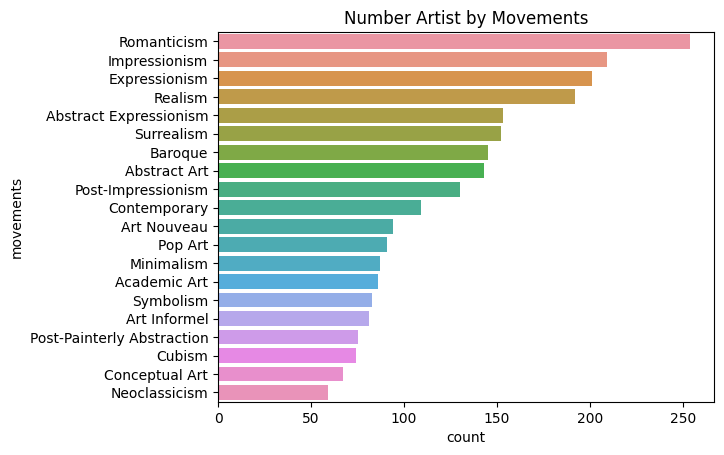

In [16]:
order = pd.value_counts(df_movements["movements"]).iloc[:20].index
sns.countplot(df_movements, y="movements", order = order).set(title='Number Artist by Movements')

Romanticism is the artistic movement with more artists registered on the WikiArt platform, followed by Impressionism and Expressionism.

Distribution by Nationality

In [17]:
print(f"There artists of {df.nation.unique().shape[0]} different nationalities")

There artists of 107 different nationalities


In [18]:
df["nation"].value_counts()

nation
American        520
French          402
Italian         269
British         249
German          160
               ... 
Italians          1
Bangladeshis      1
Romanians         1
Bosnian           1
Cameroonian       1
Name: count, Length: 106, dtype: int64

Plotting top 20 nations of artists

[Text(0.5, 1.0, 'Number artist by nationality')]

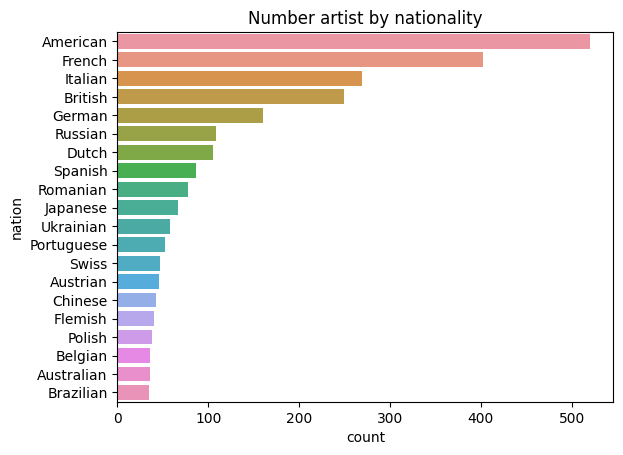

In [19]:
order = pd.value_counts(df["nation"]).iloc[:20].index
sns.countplot(df, y="nation", order = order).set(title='Number artist by nationality')

The majority of artists registered on the platform are Americans (520), followed by French (402) and Italians (269).

Distribution by Number of artworks

In [20]:
df["totalWorksTitle"].describe()

count    2996.000000
mean       57.140521
std       109.972460
min         0.000000
25%        16.000000
50%        27.000000
75%        55.000000
max      1931.000000
Name: totalWorksTitle, dtype: float64

[Text(0.5, 1.0, 'Distribution of number of artworks')]

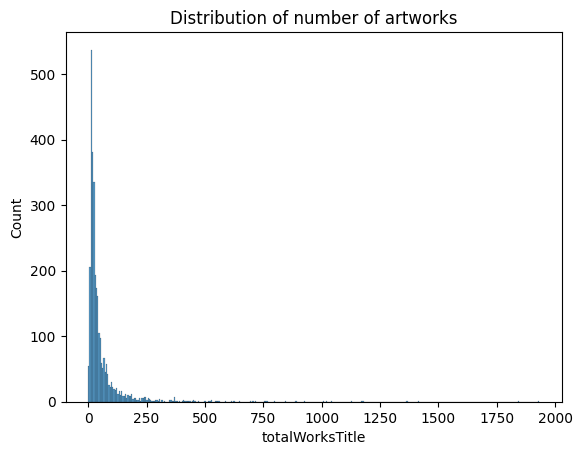

In [21]:
sns.histplot(df, x="totalWorksTitle").set(title='Distribution of number of artworks')

Based on the plot, it can be concluded that most artists have fewer than 100 works on the platform, with an average of 57.14 artworks.

### Verify the distribution number of connections

Here we are going to verify the average number of connections of the attributes that represent relatioships with other entity.

In [22]:
def avg_connections_list(colunm_names):
    for column in colunm_names:
        df['length_'+column] = df[column].str.len()
        df['length_'+column] = df['length_'+column].fillna(0)

columns_relationships = ["friends", "influenced_by", "influenced_on", "institution", "movements", "school"]
avg_connections_list(columns_relationships)

### Artists with no connection

In [23]:
cl_relationships_length = ["length_friends", "length_influenced_by", "length_influenced_on", "length_institution", "length_movements", "length_school"]
df_length_rel = df[cl_relationships_length]
shape_no_rel = df_length_rel.loc[(df_length_rel==0).all(axis=1)].shape
print(f"In total {shape_no_rel[0]} observations don't have any type of relationship")

In total 23 observations don't have any type of relationship


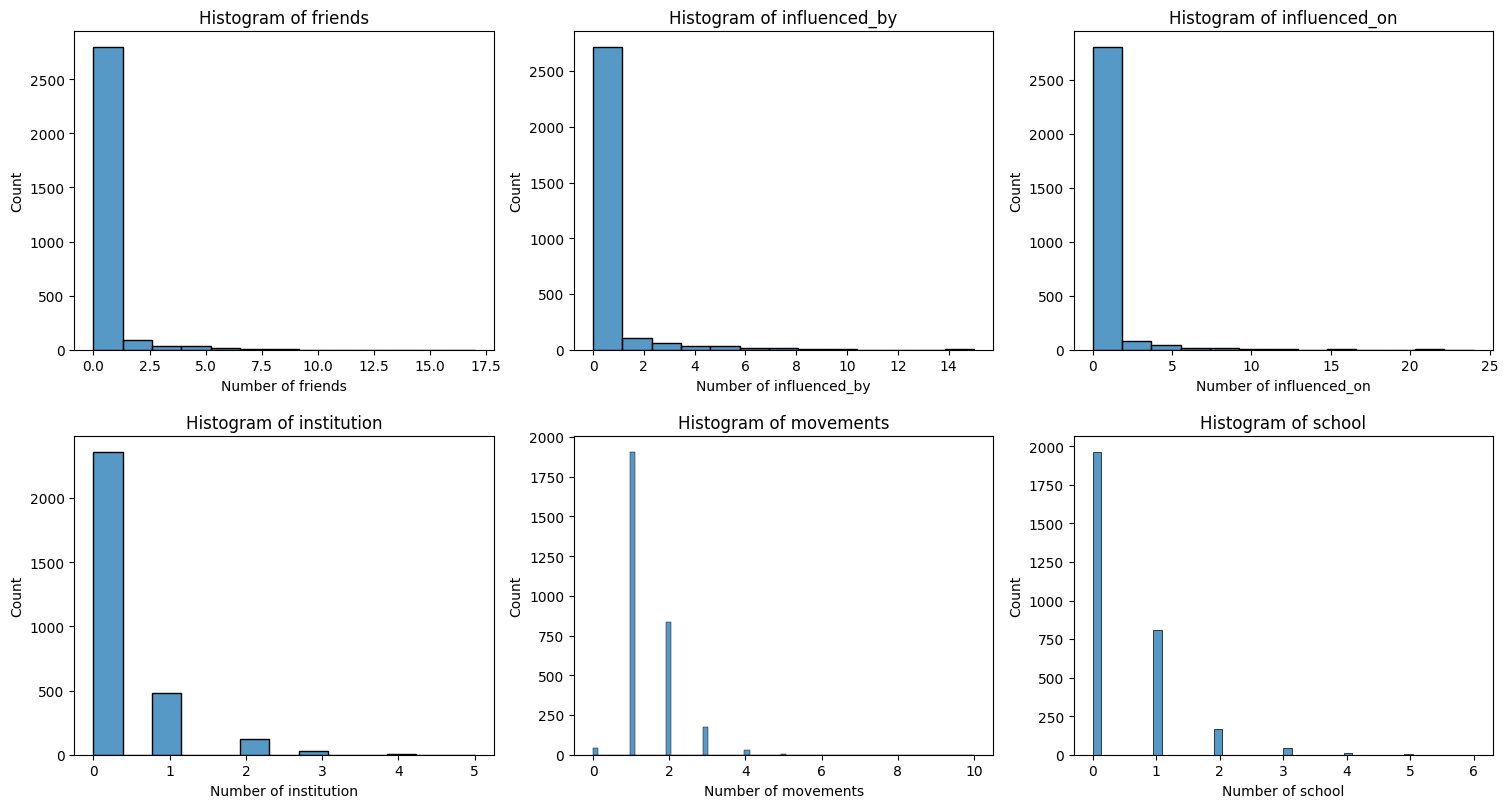

In [24]:
column_names = df_length_rel.columns
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 8))
index = 0
axes = axes.flatten()
for column in column_names:
  ax = axes[index]
  sns.histplot(df_length_rel, x=column,ax=ax)
  attr_name = column[7:]
  ax.set_xlabel(f"Number of {attr_name}")
  ax.set_title(f"Histogram of {attr_name}")
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.5)
        

### Excluding artists with zero relationship in certain column

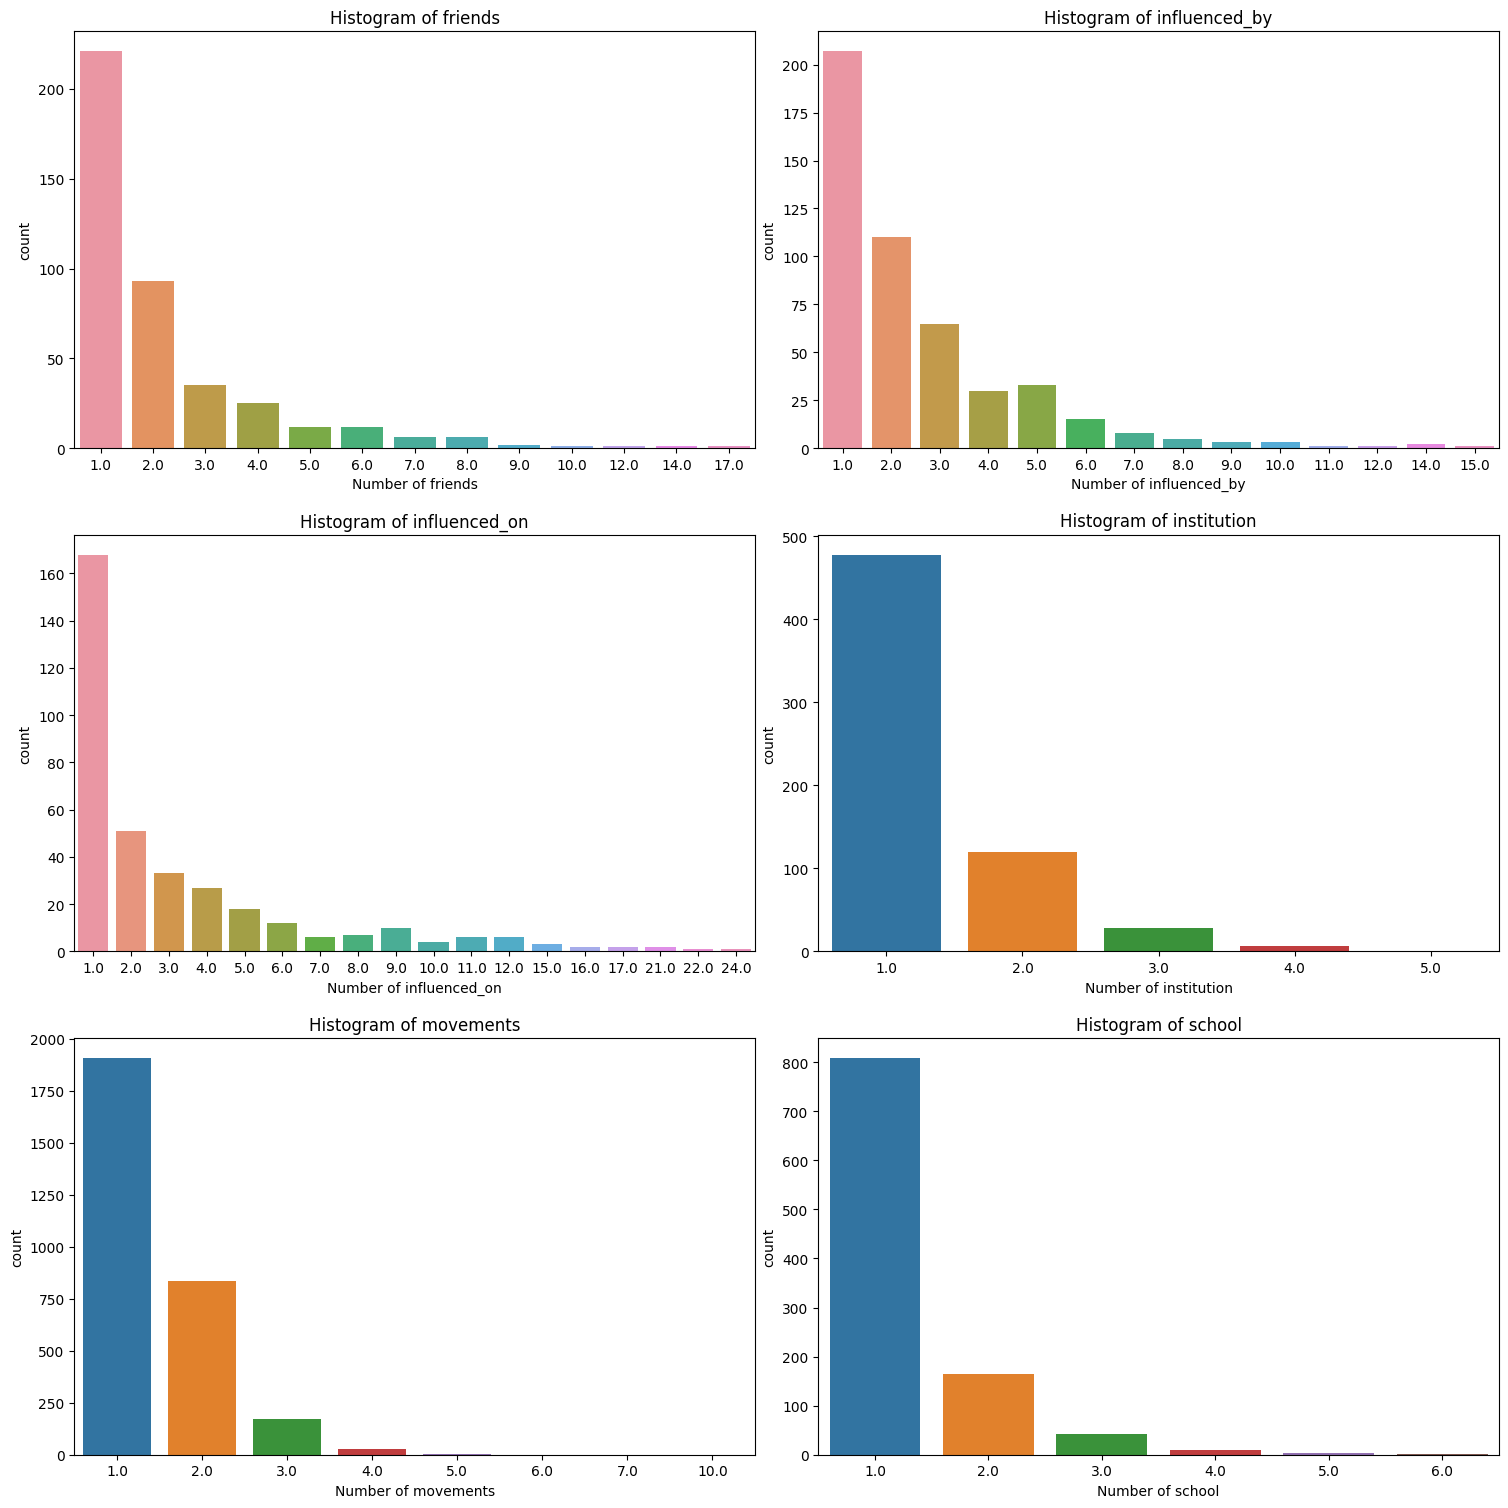

In [25]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 15))
index = 0
axes = axes.flatten()
for column in column_names:
  ax = axes[index]
  df_filtered = df_length_rel[df_length_rel[column]!=0]
  sns.countplot(df_filtered, x=column,ax=ax)
  attr_name = column[7:]
  ax.set_xlabel(f"Number of {attr_name}")
  ax.set_title(f"Histogram of {attr_name}")
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.5)

Observations:
- Almost all artists have at least one type of relationship, mostly because almost every painter is connected to a movement.

- Excluding the artists that have no relationship, most of the artists have one relationship.

- Around 800 artists are connected to a painting school (group of artists).

- Around 500 artists frequented an art institution.

## Network analysis

Loading information into a network

In [26]:
## Creating gragh
G = nx.Graph()

In [27]:
# Create the correct format to load a node
def create_nodes_dic(df, key, list_attr, type, color):
    df_filtered = df[list_attr]
    list_node_attr = df_filtered.to_dict('records')

    list_keys = df[key].values.tolist()
    list_nodes = []
    for key, dic_attr in zip(list_keys, list_node_attr):
        dic_attr["type"] = type
        dic_attr["color"] = color
        list_nodes.append((key, dic_attr))

    return list_nodes

# Load several nodes from the same type into a graph
def load_nodes(graph, list_nodes):
    graph.add_nodes_from(list_nodes)


## Load edges on the graph
def load_edges(graph, list_edges):
    for edge in list_edges:
        node1 = edge[0]
        node2 = edge[1]
        att =  edge[2]
        if graph.has_node(node1) and graph.has_node(node2):
            graph.add_edge(node1, node2,**att)


def isNaN(value):
    return value != value

In [28]:
## Create list of edges
influences_edges = []
schools_edges = []
movement_edges = []
intitution_edges = []

for index, row in df.iterrows():
    list_influenced_by = row["influenced_by"] if not isNaN(row["influenced_by"]) else []
    list_influenced_on = row["influenced_on"] if not isNaN(row["influenced_on"]) else [] 
    list_schools = row["school"] if not isNaN(row["school"]) else []
    list_movements = row["movements"] if not isNaN(row["movements"]) else []
    list_institutions = row["institution"] if not isNaN(row["institution"]) else []

    # Influenced by
    for influence in list_influenced_by:
        edge = (row["artistUrl"], influence, {'type': "influeced_by"})
        influences_edges.append(edge)
    
    # Influenced on
    for influced_on in list_influenced_on:
        edge = (influced_on, row["artistUrl"] , {'type': "influeced_by"})
        influences_edges.append(edge)

    # Schools
    for school in list_schools:
        edge = (row["artistUrl"], school, {'type': "part_of_school"})
        schools_edges.append(edge)

    # Movements
    for movement in list_movements:
        edge = (row["artistUrl"], movement, {'type': "part_of_mov"})
        movement_edges.append(edge)

    # Institutions
    for institution in list_institutions:
        edge = (row["artistUrl"], institution, {'type': "studied_at"})
        intitution_edges.append(edge)

In [29]:
## Get nodes attributes to load on the graph

# Artists
list_attr = ["id","image","nation","title","totalWorksTitle","year"]
nodes_artists = create_nodes_dic(df, "artistUrl", list_attr, "artist", "blue")

# Movements
list_movements = df["movements"].explode().unique().tolist()
nodes_movements = [(x,{"type":"movement", "color": "green", "title": x}) for x in list_movements if x == x]

# Institution
list_attr = ["city","country", "title"]
nodes_institutions = create_nodes_dic(df_institutions, "url", list_attr, "institution", "gray")

# School
list_attr = ["title"]
nodes_schools = create_nodes_dic(df_schools, "url", list_attr, "school", "red")

In [30]:
## Load artists nodes on the graph
G = nx.DiGraph()
color_map = []

## Nodes
# Load artist nodes into the graph
load_nodes(G,nodes_artists)

# Load movement nodes into the graph
load_nodes(G,nodes_movements)

# Load instution nodes into the graph
load_nodes(G,nodes_institutions)

# Load school nodes into the graph
load_nodes(G,nodes_schools)

## Edges
# Load relationship artist->arstist into the graph
load_edges(G,influences_edges)

# Load relationship artist -> movement into the graph
load_edges(G,movement_edges)

# Load relationship artist -> school into the graph
load_edges(G,schools_edges)

# Load relationship artist -> institution into the graph
load_edges(G,intitution_edges)

### Data Analysis in the Graph

Counting number of nodes and edges

In [31]:
# Counts the number of nodes given a type
def count_node_type(type):
    # Count nodes 
    filtered_nodes = [node for node, data in G.nodes(data=True) if data.get("type") == type]
    return len(filtered_nodes)

# Counts the number of edges given a type of relationship
def count_edge_type(type):
    # Count edges that have the specified attribute value
    filtered_edges = [edge for edge in G.edges(data=True) if edge[2].get("type") == type]
    return len(filtered_edges)


In [32]:
# Total number of nodes
print(f"Total number of nodes: {G.number_of_nodes()}")
print(f"- Painters: {count_node_type('artist')}")
print(f"- Movements: {count_node_type('movement')}")
print(f"- Schools: {count_node_type('school')}")
print(f"- Institutions: {count_node_type('institution')}")

# Total number of edges
print()
print(f"Total number of edges: {G.number_of_edges()}")
print(f"- Painters -> Painters: {count_edge_type('influeced_by')}")
print(f"- Painters -> School: {count_edge_type('part_of_school')}")
print(f"- Painters -> Institution: {count_edge_type('part_of_mov')}")
print(f"- Painters -> Movement: {count_edge_type('studied_at')}")

Total number of nodes: 3466
- Painters: 2996
- Movements: 177
- Schools: 220
- Institutions: 73

Total number of edges: 7337
- Painters -> Painters: 1104
- Painters -> School: 1164
- Painters -> Institution: 4263
- Painters -> Movement: 806


Creating subgraph of artists

In [33]:
# Filter nodes
filtered_nodes = [node for node, data in G.nodes(data=True) if 'type' in data and data['type'] == "artist"]
# Create a subgraph with the filtered nodes and associated edges
subgraph_artists = G.subgraph(filtered_nodes)

### Measuaring Influence

#### Finding most influencial artists of all time

In [34]:
# Get movements of a node artist
def get_movements(node_painter):
    node = node_painter
    mov_nodes = [u for v, u, attrs in G.edges(data=True)
                if (v == node and 'type' in attrs and attrs['type'] == "part_of_mov")]
    return mov_nodes

def print_top_nodes(nodes_centrality, number_top):
    top_10_degree = sorted(nodes_centrality.items(), key=lambda x: x[1], reverse=True)[:number_top]
    for node, centrality in top_10_degree:
        attr = G.nodes[node] 
        list_mov = get_movements(node)
        print(attr["title"]+" - "+ str(centrality)+";")
        if(len(list_mov)>0):
            print(list_mov)

In [35]:
# By Degree centrality
degree = nx.in_degree_centrality(subgraph_artists)
nx.set_node_attributes(subgraph_artists, degree, 'degree')
print_top_nodes(degree,10)

Paul Cezanne - 0.007679465776293823;
['Post-Impressionism']
Pablo Picasso - 0.007011686143572621;
['Cubism', 'Post-Impressionism', 'Surrealism']
Caravaggio - 0.00667779632721202;
['Baroque']
Rembrandt - 0.006343906510851419;
['Baroque', 'Dutch Golden Age']
Titian - 0.005342237061769616;
['High Renaissance', 'Mannerism (Late Renaissance)']
Diego Velazquez - 0.005342237061769616;
['Baroque']
Henri Matisse - 0.005008347245409015;
['Impressionism', 'Post-Impressionism']
Nicolas Poussin - 0.005008347245409015;
['Baroque']
Gustave Courbet - 0.004674457429048414;
['Realism']
Raphael - 0.004340567612687813;
['High Renaissance']


In [36]:
# By Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(subgraph_artists, max_iter=600)
nx.set_node_attributes(subgraph_artists, eigenvector, 'eigenvector')
print_top_nodes(eigenvector,10)

Michelangelo - 0.31255102665599643;
['High Renaissance']
Albrecht Durer - 0.31237754549426694;
['Northern Renaissance']
Giorgione - 0.3034569107740433;
['High Renaissance']
Titian - 0.2903799349850588;
['High Renaissance', 'Mannerism (Late Renaissance)']
Rogier van der Weyden - 0.2834256062421054;
['Northern Renaissance']
Jan van Eyck - 0.2645034349045184;
['Northern Renaissance']
Stefan Lochner - 0.2645007053077634;
['Gothic Art', 'Northern Renaissance']
Andrea Mantegna - 0.2485404068818404;
['Early Renaissance', 'High Renaissance']
Giotto - 0.2032901365550775;
['Proto Renaissance']
Masaccio - 0.20327332067003082;
['Early Renaissance']


In [37]:
#By PageRank
pagerank = nx.pagerank(subgraph_artists, alpha=0.85) 
nx.set_node_attributes(subgraph_artists, pagerank, 'pagerank')
print_top_nodes(pagerank,10)

Titian - 0.010472079187792279;
['High Renaissance', 'Mannerism (Late Renaissance)']
Caravaggio - 0.007611459708885872;
['Baroque']
Rembrandt - 0.0068373390151381915;
['Baroque', 'Dutch Golden Age']
Giorgione - 0.005917743520619231;
['High Renaissance']
Raphael - 0.005917176299416929;
['High Renaissance']
Nicolas Poussin - 0.00561596178305417;
['Baroque']
Michelangelo - 0.005348304846808227;
['High Renaissance']
Albrecht Durer - 0.004991558880940052;
['Northern Renaissance']
Peter Paul Rubens - 0.004154150228176153;
['Baroque']
Giotto - 0.0038845477531098582;
['Proto Renaissance']


In [38]:
# Save subgraph of painters to plot it
nx.write_graphml(subgraph_artists, "subgraph_painter_influence.graphml")

Evaluating the correlation between the genearated lists

In [39]:
pagerank_values = [pagerank[node] for node in sorted(subgraph_artists.nodes())]
eigenvector_values = [eigenvector[node] for node in sorted(subgraph_artists.nodes())]
degree_values = [degree[node] for node in sorted(subgraph_artists.nodes())]

In [40]:
tau, p_value = stats.kendalltau(degree_values, eigenvector_values)
print(f"Degree and Eigenvector: tau = {tau}, p = {p_value}")
tau, p_value = stats.kendalltau(degree_values, pagerank_values)
print(f"Degree and PageRank: tau = {tau}, p = {p_value}")
tau, p_value = stats.kendalltau(pagerank_values, eigenvector_values)
print(f"PageRank and Eigenvector: tau = {tau}, p = {p_value}")

Degree and Eigenvector: tau = 0.9769064325520451, p = 0.0
Degree and PageRank: tau = 0.9832126160887105, p = 0.0
PageRank and Eigenvector: tau = 0.979836676662274, p = 0.0


This result shows that the ranks present are highly correlated.

#### Finding most influencial artists by movement using PageRank

In [41]:
ftr_nodes_mov = [node for node, data in G.nodes(data=True) if 'type' in data and data['type'] == "movement"]
list_mov_art = []

for movement in ftr_nodes_mov:
     connected_nodes = list(G.predecessors(movement))
     artists_mov_pagerank = {artist: pagerank[artist] for artist in connected_nodes}
     max_pagerank_url = max(artists_mov_pagerank, key=artists_mov_pagerank.get)
     list_mov_art.append({"movement": movement, "artist": max_pagerank_url, "pagerank": artists_mov_pagerank[max_pagerank_url]})

# Sort the list based on 'pagerank'
sorted_data = sorted(list_mov_art, key=lambda x: x['pagerank'], reverse=True)
# Get top 10 elements
top_10 = sorted_data[:10]

print("Top 10 Arstist by Movement based on pagerank:")
print()
for item in top_10:
    movement_value = item["movement"]
    artist_value = G.nodes[item["artist"]]["title"]
    pagerank_value = item["pagerank"]
    print(f"{movement_value} - {artist_value} - {pagerank_value};")


Top 10 Arstist by Movement based on pagerank:

Mannerism (Late Renaissance) - Titian - 0.010472079187792279;
High Renaissance - Titian - 0.010472079187792279;
Baroque - Caravaggio - 0.007611459708885872;
Dutch Golden Age - Rembrandt - 0.0068373390151381915;
Northern Renaissance - Albrecht Durer - 0.004991558880940052;
Proto Renaissance - Giotto - 0.0038845477531098582;
Post-Impressionism - Paul Cezanne - 0.0038305289722474108;
Coptic art - Orthodox Icons - 0.0037335577207887726;
Byzantine Art - Orthodox Icons - 0.0037335577207887726;
Realism - Gustave Courbet - 0.003541859530480298;


#### Finding the most influential movement

In [42]:
def get_influence(type):
    # Select nodes that are movements and artists
    ftr_nodes = [node for node, data in G.nodes(data=True) if 'type' in data and data['type'] == type or data['type'] == "artist"]
    subgraph = G.subgraph(ftr_nodes)

    # Run Page Rank 
    pagerank = nx.pagerank(subgraph, alpha=0.85)
    return pagerank, subgraph
    

In [43]:
# Select nodes that are movements and artists
pagerank_mov, subgraph_movement = get_influence("movement")
ftr_nodes_type = [node for node, data in G.nodes(data=True) if data.get("type") == "movement"]
ftr_nodes = {key: value for key, value in pagerank_mov.items() if key in list_movements}
top_10= sorted(ftr_nodes.items(), key=lambda x: x[1], reverse=True)[:10]
top_10

[('Romanticism', 0.029687472980360854),
 ('Impressionism', 0.020944860177108213),
 ('Realism', 0.020165224989211555),
 ('Expressionism', 0.019507113952302767),
 ('Baroque', 0.016952445938058853),
 ('Surrealism', 0.015727746612503788),
 ('Post-Impressionism', 0.01327657787736346),
 ('Abstract Expressionism', 0.012763446480603343),
 ('Contemporary', 0.010775003277040703),
 ('Abstract Art', 0.010317773184545303)]

In [44]:
# Save subgraph of movements to plot it
nx.set_node_attributes(subgraph_artists, pagerank, 'pagerank')
nx.write_graphml(subgraph_movement, "subgraph_movement_influence.graphml")

We can see that Romanticism, Impressionism and Realis had the highest PageRank value.

#### Finding the most influential schools

In [45]:
# Select nodes that are schools and artists
list_schools = [node_id for node_id, attrs in G.nodes(data=True) if attrs.get('type') == "school"]
pagerank_school, subgraph_school = get_influence("school")
ftr_nodes = {key: value for key, value in pagerank_school.items() if key in list_schools}
print_top_nodes(ftr_nodes,10)

École de Paris - 0.011033579634100198;
Florentine School - 0.00882894480943382;
New York School - 0.0069879098727557805;
Dutch School - 0.006052119254749107;
Flemish School - 0.004844463390872454;
Fluxus - 0.004643291538982979;
Peredvizhniki (Society for Traveling Art Exhibitions) - 0.004314276581615038;
Mir Iskusstva (World of Art) - 0.004246519033992509;
Pre-Raphaelite Brotherhood - 0.004188353203628785;
Degenerate art (exhibition, held by the Nazis in Munich in 1937,  named to inflame public opinion against modernism) - 0.0039204346313882745;


In [46]:
# Save subgraph of schools to plot it
nx.set_node_attributes(subgraph_school, pagerank_school, 'pagerank')
nx.write_graphml(subgraph_school, "subgraph_school_influence.graphml")

Finding the most influential intitutions

In [47]:
# Select nodes that are institutions and artists
list_intitution = [node_id for node_id, attrs in G.nodes(data=True) if attrs.get('type') == "institution"]
pagerank_institution, subgraph_institution = get_influence("institution")
ftr_nodes = {key: value for key, value in pagerank_institution.items() if key in list_intitution}
print_top_nodes(ftr_nodes,10)

École des Beaux-Arts - 0.013253018179593724;
Guild of Saint Luke - 0.007742991437762652;
Académie Julian - 0.007090057475533044;
Art Students League of New York - 0.005807633700014834;
Imperial Academy of Arts - 0.005674034714767306;
Akademie der Bildenden Künste München (Munich Academy) - 0.00544639871037271;
Royal Academy of Arts (RA) - 0.005292494142867543;
Self-taught - 0.004778175613930012;
Kunstakademie Düsseldorf - 0.004148068778954375;
National Academy of Visual Arts and Architecture - 0.003928693320202872;


In [48]:
# Save subgraph of intitution to plot it
nx.set_node_attributes(subgraph_institution, pagerank_institution, 'pagerank')
nx.write_graphml(subgraph_institution, "subgraph_institution_influence.graphml")

### Communities

Finding communities of artists

In [50]:
community = nx.community.louvain_communities(G, seed=123)
len(community)

519

In [51]:
biggest_community = max(community, key=lambda d: len(d))

In [52]:
len(biggest_community)

142

In [53]:
# Add community labels as node attributes to all graph
# community = nx.community.louvain_communities(G, seed=123)
# Create a dictionary mapping each node to a community
dic_comm = {}
for idx, comm in enumerate(community):
    for element in comm:
        dic_comm[element] = idx

# Add community index as node attributes
nx.set_node_attributes(G, dic_comm, 'community')

The Louvain algorithm of community detection was able to find 519 communites with the biggest one containing 142 nodes.

### Visualization

All the visulazation was made using the Citoscape software, so along the notebook several files (.graphml) were saved in order to it be open in the software.

Saving files

In [54]:
# Export the graph to GraphML format
nx.write_graphml(G, "main_graph.graphml")

In [63]:
# Export the graph to GraphML format
outgoing_neighbors = list(G.successors("/en/henri-matisse"))
incoming_neighbors = list(G.predecessors("/en/henri-matisse"))
connected_nodes = list(set(outgoing_neighbors + incoming_neighbors + ["/en/henri-matisse"]))
matisse_subgraph = G.subgraph(connected_nodes)
nx.write_graphml(matisse_subgraph, "subgraph_matisse.graphml")